<a href="https://colab.research.google.com/github/KrishnaPandya-VGEC-IT/LZ77-algorithm/blob/master/trial_and_error_Vaidehi_twitter_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import requests
import io
import re 
import nltk
import string
import warnings

In [ ]:
import string

In [ ]:
pd.set_option("display.max_colwidth",200) 
warnings.filterwarnings("ignore") #ignore warnings

In [ ]:
fields = ['date','favourites_count','followers_count','language','location','retweet_count','screen_name','tweet','tweet_id','verified']
df = pd.read_csv('/content/drive/MyDrive/combined_csv.csv',usecols=fields,dtype={'text':str},encoding = 'latin-1')
df.head(20)

date  favourites_count  ...  tweet_id verified
0   06-02-2020 18:19            3452.0  ...  1.23E+18        0
1   06-02-2020 18:19             151.0  ...  1.23E+18        0
2   06-02-2020 18:19           15339.0  ...  1.23E+18        0
3   06-02-2020 18:19           65345.0  ...  1.23E+18        0
4   06-02-2020 18:19            7398.0  ...  1.23E+18        0
5   06-02-2020 18:19           78557.0  ...  1.23E+18        0
6   06-02-2020 18:19           31520.0  ...  1.23E+18        0
7   06-02-2020 18:19          220278.0  ...  1.23E+18        0
8   06-02-2020 18:19            2626.0  ...  1.23E+18        0
9   06-02-2020 18:19           49425.0  ...  1.23E+18        0
10  06-02-2020 18:19           27078.0  ...  1.23E+18        0
11  06-02-2020 18:19           99417.0  ...  1.23E+18        0
12  06-02-2020 18:19           59152.0  ...  1.23E+18        0
13  06-02-2020 18:19            4911.0  ...  1.23E+18        0
14  06-02-2020 18:19            2646.0  ...  1.23E+18        0
15  06-02-2020 18:19            8494.0  ...  1.23E+18        0
16  06-02-2020 18:19             508.0  ...  1.23E+18        0
17  06-02-2020 18:19           23283.0  ...  1.23E+18        0
18  06-02-2020 18:19             948.0  ...  1.23E+18        1
19  06-02-2020 18:19           37413.0  ...  1.23E+18        0

[20 rows x 10 columns]

In [ ]:
df.describe()

favourites_count  followers_count
count      5.408150e+05     5.408010e+05
mean       5.485302e+04     1.879467e+04
std        9.389402e+04     5.260213e+05
min        0.000000e+00     0.000000e+00
25%        3.957000e+03     2.180000e+02
50%        1.943200e+04     7.920000e+02
75%        6.365500e+04     2.984000e+03
max        2.504738e+06     8.730460e+07

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545929 entries, 0 to 545928
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              545880 non-null  object 
 1   favourites_count  540815 non-null  float64
 2   followers_count   540801 non-null  float64
 3   language          540801 non-null  object 
 4   location          533910 non-null  object 
 5   retweet_count     540801 non-null  object 
 6   screen_name       540801 non-null  object 
 7   tweet             545866 non-null  object 
 8   tweet_id          540787 non-null  object 
 9   verified          540787 non-null  object 
dtypes: float64(2), object(8)
memory usage: 41.7+ MB


In [ ]:
df.head(10)

date  favourites_count  ...  tweet_id verified
0  06-02-2020 18:19            3452.0  ...  1.23E+18        0
1  06-02-2020 18:19             151.0  ...  1.23E+18        0
2  06-02-2020 18:19           15339.0  ...  1.23E+18        0
3  06-02-2020 18:19           65345.0  ...  1.23E+18        0
4  06-02-2020 18:19            7398.0  ...  1.23E+18        0
5  06-02-2020 18:19           78557.0  ...  1.23E+18        0
6  06-02-2020 18:19           31520.0  ...  1.23E+18        0
7  06-02-2020 18:19          220278.0  ...  1.23E+18        0
8  06-02-2020 18:19            2626.0  ...  1.23E+18        0
9  06-02-2020 18:19           49425.0  ...  1.23E+18        0

[10 rows x 10 columns]

In [ ]:
df['cleaned_tweet'] = df['tweet'].str.replace("@","")
df.head()

date  ...                                                                                                    cleaned_tweet
0  06-02-2020 18:19  ...             Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA
1  06-02-2020 18:19  ...  Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly
2  06-02-2020 18:19  ...         Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía el_pais
3  06-02-2020 18:19  ...                                 Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM
4  06-02-2020 18:19  ...                          RT AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix

[5 rows x 11 columns]

In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].str.split('https').str[0]
df.head()

date  ...                                                                  cleaned_tweet
0  06-02-2020 18:19  ...  Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan 
1  06-02-2020 18:19  ...     Coronavirus disrupts China meat imports, food supply during pork shortage 
2  06-02-2020 18:19  ...          Confusión sobre el estado del médico que alertó sobre el coronavirus 
3  06-02-2020 18:19  ...                      Silenced Chinese Doc Dies of Coronavirus | Medpage Today 
4  06-02-2020 18:19  ...               RT AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies 

[5 rows x 11 columns]

In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace("I","")

In [ ]:
#removing punctuations, numbers and special characters

df['cleaned_tweet'] = df['cleaned_tweet'].str.replace("[^a-zA-Z]"," ")
df['cleaned_tweet'].astype(str)
df.head()

date  ...                                                                  cleaned_tweet
0  06-02-2020 18:19  ...  Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan 
1  06-02-2020 18:19  ...     Coronavirus disrupts China meat imports  food supply during pork shortage 
2  06-02-2020 18:19  ...          Confusi n sobre el estado del m dico que alert  sobre el coronavirus 
3  06-02-2020 18:19  ...                      Silenced Chinese Doc Dies of Coronavirus   Medpage Today 
4  06-02-2020 18:19  ...                RT AMErikaNGRLLL  Doctor who sounded alarm on coronavirus dies 

[5 rows x 11 columns]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['cleaned_tweet'].astype(str)
df.dtypes

date                 object
favourites_count    float64
followers_count     float64
language             object
location             object
retweet_count        object
screen_name          object
tweet                object
tweet_id             object
verified             object
cleaned_tweet        object
dtype: object

In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df

date  ...                                                                                                                                                             cleaned_tweet
0       06-02-2020 18:19  ...                                                                                              Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan
1       06-02-2020 18:19  ...                                                                                                         Coronavirus disrupts China meat imports food supply pork shortage
2       06-02-2020 18:19  ...                                                                                                         Confusi n sobre el estado del dico que alert sobre el coronavirus
3       06-02-2020 18:19  ...                                                                                                                       Silenced Chinese Doc Dies Coronavirus Medpage Today
4       06-02-2020 18:19  ...                                                                                                                    RT AMErikaNGRLLL Doctor sounded alarm coronavirus dies
...                  ...  ...                                                                                                                                                                       ...
545924        24-08-2020  ...                                                          day streak meditation app synctuition min daily tried lot apps legit Mindfulness COVD pic twitter com cdZNycYZst
545925        24-08-2020  ...                                                                                                                           Did miss COVD Dashboard release tonight Bahamas
545926        24-08-2020  ...  Flu Vaccination Urged During COVD Pandemic Vaccination reduce flu severity prevent hospitalizations critical considerations time health care system burdened coronavirus
545927        24-08-2020  ...                  Un grupo de expertos alemanes realiza una misi n en nuestro pa para definir una agenda de colaboraci n bilateral sobre Covid e intercambiar experiencias
545928        24-08-2020  ...                                                          Alejandro Giammattei tratar temas relacionados con la protecci n las fronteras en medio de la pandemia del Covid

[545929 rows x 11 columns]

In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].astype(str).apply(lambda x: x.split())
df.head()

date  ...                                                                             cleaned_tweet
0  06-02-2020 18:19  ...  [Ten, More, Diagnosed, With, Coronavirus, Aboard, Quarantined, Cruise, Ship, Off, Japan]
1  06-02-2020 18:19  ...               [Coronavirus, disrupts, China, meat, imports, food, supply, pork, shortage]
2  06-02-2020 18:19  ...            [Confusi, n, sobre, el, estado, del, dico, que, alert, sobre, el, coronavirus]
3  06-02-2020 18:19  ...                               [Silenced, Chinese, Doc, Dies, Coronavirus, Medpage, Today]
4  06-02-2020 18:19  ...                            [RT, AMErikaNGRLLL, Doctor, sounded, alarm, coronavirus, dies]

[5 rows x 11 columns]

In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x]))
df.head()

date  ...                                                                 cleaned_tweet
0  06-02-2020 18:19  ...  Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan
1  06-02-2020 18:19  ...             Coronavirus disrupts China meat imports food supply pork shortage
2  06-02-2020 18:19  ...             Confusi n sobre el estado del dico que alert sobre el coronavirus
3  06-02-2020 18:19  ...                           Silenced Chinese Doc Dies Coronavirus Medpage Today
4  06-02-2020 18:19  ...                        RT AMErikaNGRLLL Doctor sounded alarm coronavirus dies

[5 rows x 11 columns]

**Data Visualization**

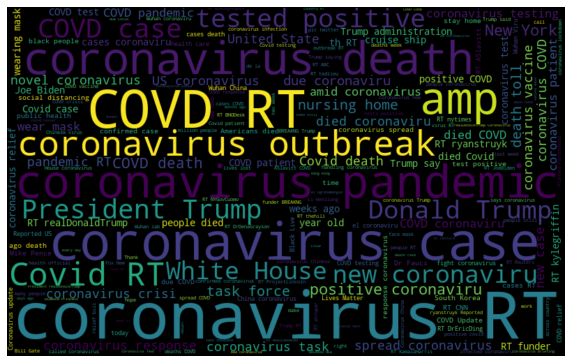

In [ ]:
all_words = ' '.join([text for text in df['cleaned_tweet']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [ ]:
df['Day'] = df['date'].str[0:10]
df.head(1000)

date  ...         Day
0    06-02-2020 18:19  ...  06-02-2020
1    06-02-2020 18:19  ...  06-02-2020
2    06-02-2020 18:19  ...  06-02-2020
3    06-02-2020 18:19  ...  06-02-2020
4    06-02-2020 18:19  ...  06-02-2020
..                ...  ...         ...
995  06-02-2020 18:33  ...  06-02-2020
996  06-02-2020 18:33  ...  06-02-2020
997  06-02-2020 18:33  ...  06-02-2020
998  06-02-2020 18:33  ...  06-02-2020
999  06-02-2020 18:33  ...  06-02-2020

[1000 rows x 12 columns]

In [ ]:
pip install mpld3

     |████████████████████████████████| 890kB 7.3MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp36-none-any.whl size=200618 sha256=dc8ad5adc384bd4494e2d2566f0dfff4ef778fa7959dbfb3b94099bddbe77ce3
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3


In [ ]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [ ]:
from textblob import TextBlob 

In [ ]:
df['Polarity'] = 0
df.head(10)

date  favourites_count  ...         Day Polarity
0  06-02-2020 18:19            3452.0  ...  06-02-2020        0
1  06-02-2020 18:19             151.0  ...  06-02-2020        0
2  06-02-2020 18:19           15339.0  ...  06-02-2020        0
3  06-02-2020 18:19           65345.0  ...  06-02-2020        0
4  06-02-2020 18:19            7398.0  ...  06-02-2020        0
5  06-02-2020 18:19           78557.0  ...  06-02-2020        0
6  06-02-2020 18:19           31520.0  ...  06-02-2020        0
7  06-02-2020 18:19          220278.0  ...  06-02-2020        0
8  06-02-2020 18:19            2626.0  ...  06-02-2020        0
9  06-02-2020 18:19           49425.0  ...  06-02-2020        0

[10 rows x 13 columns]

In [ ]:
def get_tweet_sentiment(tweet): 
  list_positive_words = ['recovered','survived','vaccine','vaccination','recovery','immunity','immunization','cases reduced','recovering','reducing cases']
  list_negative_words = ['died','infected','spread','death','infect','rip','cases increased','increasing cases']
  count_positive_words = [0,0,0,0,0,0,0,0,0,0]
  count_negative_words = [0,0,0,0,0,0,0,0]
  tweet2 = tweet.split(' ')
  for i in range(0,len(list_positive_words)):
    if list_positive_words[i] in tweet2:
      count_positive_words[i]+=1
  for j in range(0,len(list_negative_Words)):
    if list_negative_words[i] in tweet2:
      count_negative_words[i]+=1

  max_val_positive = 0
  position_positive = -1  
  for i in range(0,len(count_positive_words)):
    if(count_positive_words[i]>max_val_positive):
      max_val_positive = count_positive_words[i]
      position_positive = i

  max_val_negative = 0
  position_negative = -1  
  for i in range(0,len(count_negative_words)):
    if(count_negative_words[i]>max_val_negative):
      max_val_negative = count_negative_words[i]
      position_negative = i
  
  

In [ ]:
list_tweets = df['tweet'].to_list()
list_output = []
for i in list_tweets:
    print(i)

Streaming output truncated to the last 5000 lines.
RT @evankirstel: #Doctors in #Beijing carry out #5G teleconsultation services with a hospital in #Wuhan to battle the #coronavirus outbreak
RT @REKTstonkMAN: China eating lunch in cardboard box cubicles yet people buying $jd above $41 lmao #coronavirus https://t.co/L8vOqVe22v
RT @niubi: At least 500 Wuhan medical staff infected with coronavirus https://t.co/kQJp0XDXSF via @scmpnews "the sources said doctors and n
@NuQum4Real It doesnt surprise me at all that the establishment media and the corporate health care industry want us to believe the #WuhanVirus is out of control...the reality is, humans will beat this like we do all unpredictable viruses...#CoronavirusOutbreak #CoronaOutbreak #coronavirus
RT @prayingmedic: The media are pushing coronavirus stories non-stop
Ever wonder why?
Do they have an endgame?
Of course, they do.
They hop
RT @LazyMeatball: Coronavirus Daily update
?Death toll: 1,018
?Recovered: 4,336
?Infected: 43,143

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
@DanieeJoy Get well soon.
And as somebody just getting over Laryngitis,
good luck convincing everybody you know that you do not have the CoronaVirus.

Also, the Dark Knight is on Netflix. https://t.co/dbFXw4b9Kh
RT @SaraLlanes: @WHO @CDCgov @NIH @DrTedros Anyone care to comment? #COVID19 #coronavirus
RT @cahulaan: With stricken cruise ship, Japan draws criticism over coronavirus response: As the virus-stricken Diamond Princess cruise shi
RT @PrisonPlanet: Due to coronavirus, Russia has banned all Chinese citizens from entering the country for tourism, work and for private pu
RT @news_ntd: "All the doors are barricaded...All the houses are sealed up."

In efforts to stem the #coronavirus outbreak, at least 80 cit
RT @peytnhaag: i just overheard this little white girl in starbucks say china has too many ppl anyways whats so bad about coronavirus an
@MackayIM Sure.  Think about it.  Feces, surfactants, mechanical action.  A Chinese

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
RT @AngryBlackLady: Apparently, fewer people are are eating Chinese food or frequenting Chinatown because of the coronavirus. 

I ordered s
Facebook adds fuel to coronavirus panic by CANCELING in-person part of developer conference https://t.co/QdtQyasMAc 
   
#US#Economy
RT @shawgerald4: @realDonaldTrump #coronavirus isn't a political issue...
The left are suffering from TDS
#Sad #Trump2020NowMoreThanEver ht
RT @realDonaldTrump: So, the Coronavirus, which started in China and spread to various countries throughout the world, but very slowly in t
Another fear-mongering tactic with Coronavirus?
PolitiFact - 2014 Lie of the Year: Exaggerations about Ebola https://t.co/qlbUwY3pw6
RT @realDonaldTrump: So, the Coronavirus, which started in China and spread to various countries throughout the world, but very slowly in t
RT @realDonaldTrump: So, the Coronavirus, which started in China and spread to various countries throughout the world

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
#SoundToLight #LEDScreens https://t.co/QH1IKhzIDZ
RT @sfpelosi: I dont know where the coronavirus get tested website is  but when it appears, Trump better NOT give our DNA data over to pr
RT @drJoshS: Is our health insurance system up to the challenge of #COVID19? ?

Quickly standing up crisis insurance coverage based on Medi
RT @CREWcrew: Jared controlled a family firm now running a covid testing site.

Ivanka got a Chinese voting machine trademark before 2018 e
RT @InesSainzG: Se acabo la democracia!! Golpe bajo en plena crisis mundial, en el remolino del coronavirus, se aprovechan del momento y en
RT @axios: A study has indicated that if Chinese authorities had acted three weeks earlier than they did, the number of coronavirus cases c
RT @DjMightyMi: Top 10 Coronavirus Songs ?
1. Stakes Is High/De La
2. No Escapin' This/Beatnuts
3. Come Clean/Jeru
4. The Moment I Feared/S
.A new Chinese coronavirus, a cousin of the SARS viru

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
RT @SecPompeo: I recall vividly (it was Superbowl Sunday) how at the onset of the #coronavirus pandemic, as the world tuned into the game,
RT @RedWalrus1: Gov. Cuomo: 16,000 New Yorkers could die from the coronavirus, according to Gates Foundation-backed projections: https://t.
RT @HillaryClinton: Two shocking facts of this administration's failures to lead on COVID:

1. The Pentagon offered HHS 2,000 ventilators b
RT @SallyDeal4: Repubs: Nobody Expected the #Coronavirus Pandemic. So #JoeBiden Is Nobody?

#Biden wrote an op-ed on Jan. 17, warning tha
BREAKING: Florida Gov. Ron DeSantis issues a statewide stay-at-home order as federal and local pressure mounted. 

????:???????????,???????Ron DeSantis?????????????????  

#COVID19
#coronavirus 
#Wuhancoronavirus https://t.co/dn2zqVmXUo
RT @NBCNews: What is especially concerning, one doctor notes, is how quickly vulnerable coronavirus patients take a sharp turn for the wors
RT @CNNP

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
RT @blackwomenviews: Mass graves in 2020. This is Trump's America. #COVID?19 https://t.co/cNPyGutTpD
RT @renoomokri: Dear @Maxiuyi,

You exemplify what I teach. #CoronaVirus brings out the beggar in you. You no longer read posts. You have o
RT @EECastilloAP: Ecuador struggles to bury coronavirus dead; some bodies lost (from @AP) By ?@cearmario?  https://t.co/rZfP8YbZxC
If you sacrifice your life in the battle of the Chinese CoVid- 19 for the freedom of this country, I will respect you like those that sacrificed their lives in wars for the freedom of this nation. Let's go!  Let's get back to work.  We need to get back to work, or we're finished.
Coronavirus-driven unemployment claims soaring in state, nation https://t.co/w5AKVhLrAP
RT @danielr_serrano: Así celebró Wuhan el fin de la cuarentena y un paulatino regreso a la "normalidad" ???? Ahora nosotros a quedarnos en
RT @npratc: The federal government will end funding for coronavirus

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
ALONG WITH DR FAUCI &amp; THE NIAID,
THE WUHAN LEVEL 4 LAB PARTNERED
'It's a racial justice issue': Black Americans are dying in greater numbers from Covid-19

#Injustice #PrivateHealthCare #AfricanAmerican #COVID19

https://t.co/Lm6gNdU3pj
Azodicarbonamide, Dough Conditioner, Contributing to the Coronavirus Pandemic? Similar Symptoms 
https://t.co/q5tscijhrX
RT @officialmcafee: NYC has had 11,000 Covid deaths.

Tokyo, the World's largest and densest city, has had 93.

NYC is locked down.

Tokyo
RT @HarryStebbings: Just got out Uber &amp; driver was making 95% less money than pre COVID. 

So in 4 weeks she learned @webflow &amp; is now maki
RT @officialmcafee: NYC has had 11,000 Covid deaths.

Tokyo, the World's largest and densest city, has had 93.

NYC is locked down.

Tokyo
BBC News - #Coronavirus: Australia urges G20 action on #wildlife wet markets https://t.co/YZOCWSiDHe
RT @PeaceHappyJoy: The other side of Covid in 
The world

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
https://t.co/V8dFhxOJMV
https://t.co/jTMd2VVqh8
RT @AlexBerenson: Lets be clear: the fact the nursing home deaths are not front and center every day in elite media coverage of #COVID tel
RT @RaheemKassam: Pitt researcher studying coronavirus killed in suspected murder-suicide in Ross Township https://t.co/xHelDSeDIU
Trumps Fox News Coronavirus Town Hall: A Closer Look https://t.co/OwWsc5Wkyr via @YouTube   Trump isnt running for re-election hes trying to stay out of jail....
RT @BuckSexton: The premise that we cannot reopen NYCs economy until we have sufficient contact tracers in place for covid exposure is f
RT @charliekirk11: Why is the Left okay with Coronavirus ID cards but aggressively opposed to voter ID?

?
RT @washingtonpost: Trump keeps predicting coronavirus death tolls the U.S. then surpasses https://t.co/EIe47n4Uqi
Hope it was spectacular! #ThankYou #StarWarsDay #weshinetogether #COVID19 #cleaning #CleanUp #coronav

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
No propaganda the @GOP tweets can change that @realDonaldTrump did not protect this country from the coronavirus. 
https://t.co/Y63dx8A3PG https://t.co/BvQ0uVgVQz
RT @CNBC: Moderna's early-stage human trial for a coronavirus vaccine produced antibodies in all 45 participants. https://t.co/dxLqAMuHak
CNBC: Trump threatens to permanently cut off WHO funding and withdraw US membership, amid coronavirus pandemic
RT @nycsouthpaw: Openly gutting the 30 day period required by law or a covid thing? https://t.co/jPNX9BGi9Z https://t.co/9ObZyhCXFJ
RT @normanswan: And thats for measles with lifelong immunity compared to COVID 19 which will probably be 40 weeks.
RT @MikkoAlanne: L.A. Times: Georgias coronavirus data made reopening look safe. The numbers were a lie. https://t.co/ukuue17rAL #COVID19
RT @JoeBiden: Donald Trump is not responsible for the coronavirus. But he does bear full responsibility for failing to protect our nation f
RT @JoeBi

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

Zinc inhibits #coronavirus activity &amp; blocking its replication.

Dr. Anth
@JeffereyJaxen Autism now impacts 1 in 24 children, Covid impacts practically none.

Which one is the epidemic again?
RT @MilanToLA: How many new Covid cases will we have come next Friday?!
RT @estebancoach: Yo me muero por un beso tuyo, el coronavirus qué? https://t.co/24RRs5tMbC
With all the riots, I must say I was impressed with all the masks, although Im not sure whether due to covid or the desire not to be identified.
RT @PHARAOH_ATEN_: THE #CORONAVIRUS DIDNT WORK SO THEY STAGED A #RIOT TO TRY &amp; #INSTITUTE #MARTIALLAW????? BUT YALL HAVE FUN BEING #SHEEP O
@realDonaldTrump OVER 1 MILLION INFECTED AND NOW OVER 100,000 DEATHS FROM COVID DUE TO YOUR INCOMPETENCE
RT @picardonhealth: New Brunswick, which thought it has stamped out #coronavirus, delays reopening amid cluster of new cases linked to doct
RT @jrnalll: donald trump literally called the cor

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
@cfishman Also, for anyone telling you about COVID again, CDC estimates 1.3M in nursing and assisted living. Out of 330M people, that's 0.39% of pop. That same group represents over 50% of COVID deaths.
RT @DrRobDavidson: IMPORTANT: In coming weeks, as #COVID19 numbers stay high (or rise) in many states, @realdonaldtrump may try to blame it
There are opportunities available despite the immense challenges Higher Education is currently facing. Download the Higher Education Recovery eBook that outlines the critical questions you should be asking: https://t.co/oEvkpIcwbk

#covid19 #kaufmanhall #highereducation
'We plan and prepare for disruptions': How IU Health is getting through the pandemic without layoffs or pay cuts https://t.co/LnmBTlpr8u #BeckersHR #COVID19 https://t.co/roYvCrFjXx
5) Stop analyzing racial data of Whole Foods stores as a means of busting attempts to unionize
6) Hell, stop busting attempts to unionize
7) Grant paid s

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
We should be wearing masks. We should be social distancing, she s
RT @SingingHillsInc: 2020. Covid, riots, lockdowns. Didn't hurt. No #h2b visas. That hurts. Canceled an entire new line of business. Turnin
Covid 19 is real people #WearYourMask https://t.co/nAwUtUF3WG
RT @Juju71845742: @ChuckCallesto Purely political. Why did Pelosi, Harris, Warren and others join in thousands of protesters IF covid was t
RT @ChargerAc: Trying to wrap my mind around recruiting beginners, rehearsals during COVID, and wondering if marching band will take place.
RT @rhysblakely: Breaking: Oxford researchers find 1st drug proven to reduce Covid deaths 

Low-cost steroid dexamethasone reduced death by
RT @RepTimBurchett: The #ChineseCommunistParty deliberately covered up the #COVID19 outbreak and -- along with the @WHO's careless response
RT @beanbaaag: #worldwar3 making its way back after defeating the coronavirus in the gulag https://t.co/q9siGAxJ

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
RT @UMiamiMedNews: Tune into @nbc6 today at 4pm where reproductive medicine expert and urologist @ranjithramamd discusses how #COVID19 may
RT @PinkNews: Not even the coronavirus pandemic could stop these right-wingers staging a pathetic Straight Pride protest  https://t.co/DvSr
RT @RonWyden: The numbers don't lie: communities in Oregon and nationwide have been hit with an economic wrecking ball by #COVID19. Last ni
I reach for my phone as soon as I wake up, scared to see what's happening. We needed this Hasan! I live in Michigan, we're kicking COVID's a**! ? And we're having a beautiful summer! You're wrong though, you WILL be in the history books, but your name will be spelled correctly! https://t.co/9ZzIccXHOI
RT @AnaCabrera: Dr Fauci: I would not be surprised if we go up to 100,000 (#COVID19 cases) a day
RT @axios: NEW: Anthony Fauci testified that he would "not be surprised" if the U.S. begins reporting as many as 100,000 new 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
RT @djf510: My neighbors teen grandsons have been back to school 2 weeks. Both are sick. Tested for Covid. Negative. They are suffering fr
RT @DoctorHenryCT: I have been vaccinated my whole life. However, if there is a Covid vaccine rushed for the election, I will not take it.
RT @DeAnna4Congress: Could you imagine what a huge scandal it would be if there were a medication that could cure the coronavirus and the e
RT @DanRather: The climate crisis is as real as the COVID crisis. Am I right California?
RT @CeeHawk: IG stories let me know COVID gonna have a Frank Gore career
RT @DanRather: The climate crisis is as real as the COVID crisis. Am I right California?
@MastiCarrots @NYGovCuomo And yes the whole lie that masks dont work and are unnecessary. That was WRONG. The leaders of the UK, USA, most of Europe. the WHO lied to us about the masks. Masks are hugely effective. WEAR ONE. Protect yourself. I do. Despite being knee deep i

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
#CovidTesting for #COVID19 was and is a farce in UK
RT @SoyAjenjo: El coronavirus ingresando al cuerpo de Lilian Samaniego https://t.co/d0GvdVKNlO
RT @MaddowBlog: "At least seven people have died in connection to a coronavirus outbreak that continues to sicken people in Maine following
That red velvet rope experience.  #outdoordining #nyc #covid_19 #coronavirus #socialdistancing https://t.co/g9bNVoZcT7
RT @freebird939: Coronavirus was created in Wuhan lab, Chinese virologist Li-Meng Yan exposes China https://t.co/N1i4yw8VgS via @dna @dna
@nctleos Working before covid.  Nothing but k-pop now. I'm a major multistan now??? back to work now and still listening and discoring more groups and artists. https://t.co/IHvYoohhWE
RT @BenLaBolt: New study:  U.S. global reputation plummets due to Trumps coronavirus response, only 15% say it was handled well https://t.
RT @KevinCate: First. Good news. The Trump team found a scientist in a lab with

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
@USATODAY Why dont you actually do some work and provide a service to the public?   How many of those deaths were in nursing homes and how many had other illnesses?  Big difference between dying OF Covid vs dying WITH Covid.
RT @JenAshleyWright: Imagine if Republicans had moved on COVID as quickly as they're moving to replace RBG.
@realDonaldTrump My cousin who lives in PA died yesterday because of Covid. Because you LIED and denied us help.
RT @ProjectLincoln: The Senate GOP suddenly found the energy to fill a SCOTUS vacancy, but are still delaying a covid relief bill that woul
RT @drpatesblog: Well, it doesnt appear that @westadaschools really understands much about how to operate in an environment of COVID. This
RT @ClaraJeffery: COVID now 4th largest mass casualty event in US history. Topped only by the Civil War, WWII, 1918 flu pandemic.
Finland to deploy coronavirus-sniffing dogs at Helsinki Airport  https://t.co/kGoqGit8IK
R

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

https://t.co/G
RT @Mikel_Jollett: NOW THAT THE PRESIDENT HAS IT, it's called the "coronavirus" not the "China-virus."

NOW THAT THE PRESIDENT HAS IT, it's
RT @JessicaValenti: I still can't get over that the president, a known serial liar, was allowed to walk in to the debate hall with no Covid
RT @SenSchumer: The decision to recess the Senate for 2 weeks after at least 3 GOP Senators have tested positive for COVID makes clear that
RT @kylegriffin1: PSA: A negative COVID test does not mean a person should shirk CDC guidelines. Regardless of test results, wear a mask an
This man works (for free) night and day, COVID or not, for us; the American People! Please continue to pray for this brave man and pray he wins in 30 days. The future of our beautiful Country depends on getting this #warrior back to good health and putting #AmericaFirst ?? https://t.co/Mo9eLMBpJe
RT @AlishaRai: (I say suspected COVID because this was back in April w

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Geri
August 13, 2020
$TPTW could be a vendor as well. $TPTW has a rapid Covid antibody test in their #COVID19  pod with results in minutes.  https://twitter.com/steensn/status/1294037148094603265  pic.twitter.com/rFUg7UfgzK
If you could save a child's life would you?
If you could make schools safer for all would you?
If you could protect teachers from #COVID19 would you?
I have 9k followers if everyone donated $1 dollar you could do so much for these children.
Help me #VetsResistSquadron
#Covid_19
Food Industry in times of #COVID19 #COVID
???????????????????
#covidwashing 

Check out perspective
@ncdalliance @WorldObesity @JBerdegueFAO @vaguayounicef https://twitter.com/mariel_whites/status/1294026116169072641 
ventilation > ventilators

#BackToSchool2020 #AirQuality #sendhelp #refusetoreturn #OnlyWhenItsSafe @NYCMayor @DOEChancellor @UFT #EDUcators #teachertwitter #iteachmath #MTBoS #mathchat #mfaproud #COVID19 #nycschools #NYC
As m